In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reference data
hefile = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/he__data/Global_Urban_Land_2010_upscaled.gl5'
val_data = np.fromfile(hefile, dtype='float32').reshape(2160, 4320)
# verification
ref_path = '/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_msk_/city_clrd0000.gl5'
ref = np.fromfile(ref_path, dtype='float32').reshape(2160, 4320)
# job
for num in range(1, 1861):
    msk = np.ma.masked_where(ref!=num, ref)
    grid_num = np.sum(msk)
    if grid_num == 0:
        continue
        
    count = 0
    true = 0
    false = 0
    
    for i in range(2160):
        for j in range(4320):
            if msk[i,j] != 0:
                if val_data[i,j] == 1:
                    true += 1
                else:
                    false += 1
                count += 1
    
    rate = true/count
    print(num, true, false, count, rate)

KeyboardInterrupt: 

In [3]:
he_text = f'/mnt/c/Users/tsimk/Downloads/dotfiles/h08/camacity/dat/cty_lst_/he_validation.txt'
cama_text = f'/mnt/c/users/tsimk/downloads/dotfiles/h08/camacity/dat/cty_lst_/create_text/camacity_second.txt'

with open(he_text, 'r') as files:
    he_lines = files.readlines()
with open(cama_text, 'r') as files:
    cama_lines = files.readlines()

In [5]:
he_lines[0]

'1|0.9139784946236559|85|8|93\n'

In [11]:
true_list = []
false_list = []

for ind in range(1860):
    # cama file
    line_cama = cama_lines[ind]
    parts_cama = line_cama.split('|')
    parts_cama = [item.strip() for item in parts_cama]
    ovlp_flg = parts_cama[1]
    dwn_flg = parts_cama[2]
    if ovlp_flg == 'RMVD' or dwn_flg == 'NoMK':
        continue

    # he file
    for line in he_lines:
        if int(line.split('|')[0].strip()) == int(ind)+1:
            line_he = line
    parts_he = line_he.split('|')
    parts_he = [item.strip() for item in parts_he]
    true_list.append(int(parts_he[2]))
    false_list.append(int(parts_he[3]))

In [12]:
print(true_list)

[85, 35, 33, 43, 33, 22, 62, 11, 22, 28, 13, 47, 13, 12, 34, 34, 40, 9, 29, 9, 49, 15, 16, 16, 45, 11, 9, 12, 36, 19, 82, 11, 20, 15, 11, 15, 20, 29, 20, 16, 21, 15, 6, 32, 6, 7, 24, 17, 26, 38, 14, 27, 15, 9, 23, 33, 39, 19, 19, 31, 67, 11, 9, 66, 8, 25, 32, 33, 74, 7, 8, 4, 11, 4, 9, 19, 22, 10, 30, 27, 17, 6, 5, 10, 12, 33, 12, 41, 51, 9, 29, 50, 33, 48, 9, 12, 18, 13, 13, 15, 15, 24, 14, 8, 10, 9, 11, 15, 19, 4, 29, 6, 6, 8, 10, 9, 7, 24, 10, 34, 4, 15, 9, 6, 10, 9, 16, 12, 5, 9, 7, 8, 7, 21, 4, 12, 14, 19, 13, 14, 6, 11, 10, 17, 5, 14, 10, 7, 8, 56, 6, 7, 20, 16, 7, 22, 5, 9, 14, 22, 5, 33, 7, 19, 11, 5, 3, 36, 6, 4, 7, 10, 26, 11, 4, 8, 14, 12, 7, 47, 8, 2, 6, 6, 8, 8, 4, 6, 7, 5, 15, 5, 6, 1, 4, 12, 5, 29, 8, 8, 4, 0, 10, 14, 8, 21, 7, 4, 11, 6, 28, 7, 7, 9, 8, 9, 5, 0, 14, 6, 0, 4, 27, 11, 10, 17, 28, 19, 7, 6, 22, 12, 26, 24, 5, 12, 7, 6, 22, 16, 8, 7, 11, 8, 4, 12, 11, 9, 8, 12, 11, 5, 6, 9, 8, 3, 32, 11, 26, 0, 8, 1, 5, 5, 2, 7, 9, 5, 12, 10, 7, 17, 4, 5, 6, 6, 33, 4, 24, 3,

([<matplotlib.axis.XTick at 0x7fe6f9e5f310>,
 [Text(1, 0, 'Large'), Text(2, 0, 'middle'), Text(3, 0, 'low')])

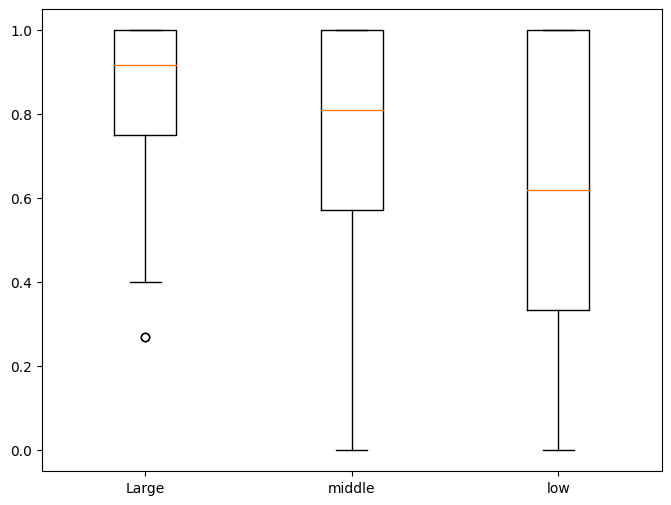

In [23]:
big = [i/(i+j) for i, j in zip(true_list[:100], false_list[:100])]
middle = [i/(i+j) for i, j in zip(true_list[100:500], false_list[100:500])]
low = [i/(i+j) for i, j in zip(true_list[500:], false_list[500:])]

data = [big, middle, low]
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.xticks([1, 2, 3,], ['Large', 'middle', 'low'])

In [26]:
true_list = []
false_list = []
region_list = []

for ind in range(1860):
    # cama file
    line_cama = cama_lines[ind]
    parts_cama = line_cama.split('|')
    parts_cama = [item.strip() for item in parts_cama]
    ovlp_flg = parts_cama[1]
    dwn_flg = parts_cama[2]
    if ovlp_flg == 'RMVD' or dwn_flg == 'NoMK':
        continue

    # he file
    for line in he_lines:
        if int(line.split('|')[0].strip()) == int(ind)+1:
            line_he = line
    parts_he = line_he.split('|')
    parts_he = [item.strip() for item in parts_he]
    true_list.append(int(parts_he[2]))
    false_list.append(int(parts_he[3]))
    region_list.append(parts_cama[8])

print(np.unique(region_list))

['caribbean' 'central america' 'central asia' 'eastern africa'
 'eastern asia' 'eastern europe' 'middle africa' 'northern africa'
 'northern america' 'northern europe' 'oceania' 'south america'
 'south-eastern asia' 'southern asia' 'southern europe' 'western africa'
 'western asia' 'western europe']


dict_keys(['northern america', 'central america', 'caribbean', 'south america', 'northern europe', 'western europe', 'southern europe', 'eastern europe', 'northern africa', 'western africa', 'middle africa', 'eastern africa', 'western asia', 'central asia', 'southern asia', 'south-eastern asia', 'eastern asia', 'oceania'])


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'northern america'),
  Text(2, 0, 'central america'),
  Text(3, 0, 'caribbean'),
  Text(4, 0, 'south america'),
  Text(5, 0, 'northern europe'),
  Text(6, 0, 'western europe'),
  Text(7, 0, 'southern europe'),
  Text(8, 0, 'eastern europe'),
  Text(9, 0, 'northern africa'),
  Text(10, 0, 'western africa'),
  Text(11, 0, 'middle africa'),
  Text(12, 0, 'eastern africa'),
  Text(13, 0, 'western asia'),
  Text(14, 0, 'central asia'),
  Text(15, 0, 'southern asia'),
  Text(16, 0, 'south-eastern asia'),
  Text(17, 0, 'eastern asia'),
  Text(18, 0, 'oceania')])

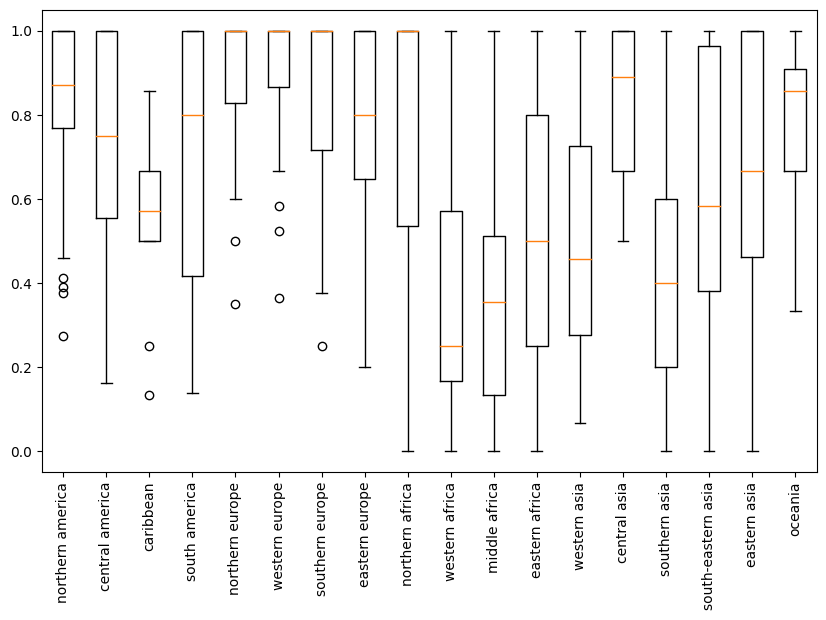

In [41]:
from collections import defaultdict

rate_list = [i/(i+j) for i, j in zip(true_list, false_list)]
data = []
original_dict = defaultdict(list)
for region, rate in zip(region_list,  rate_list):
    original_dict[region].append(rate)
    
new_order = ['northern america', 'central america', 'caribbean', 'south america', 
             'northern europe', 'western europe', 'southern europe', 'eastern europe',
             'northern africa', 'western africa', 'middle africa', 'eastern africa', 
             'western asia', 'central asia', 'southern asia', 'south-eastern asia', 'eastern asia',
             'oceania',
            ]
             
reordered_dict = {key: original_dict[key] for key in new_order}

print(reordered_dict.keys())
plt.figure(figsize=(10, 6))
plt.boxplot(reordered_dict.values())
plt.xticks(np.arange(1, len(name_list)+1), new_order)
plt.xticks(rotation=90)

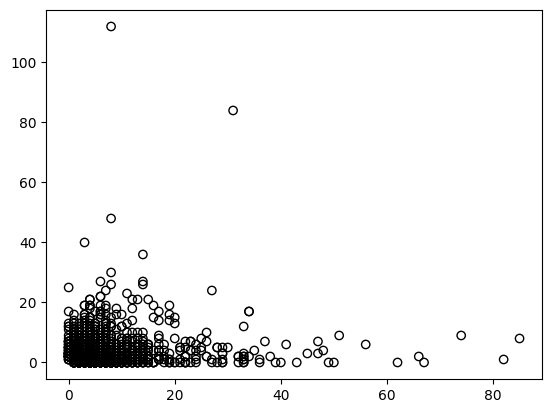

In [16]:
plt.scatter(true_list, false_list, facecolor='none', color='black')

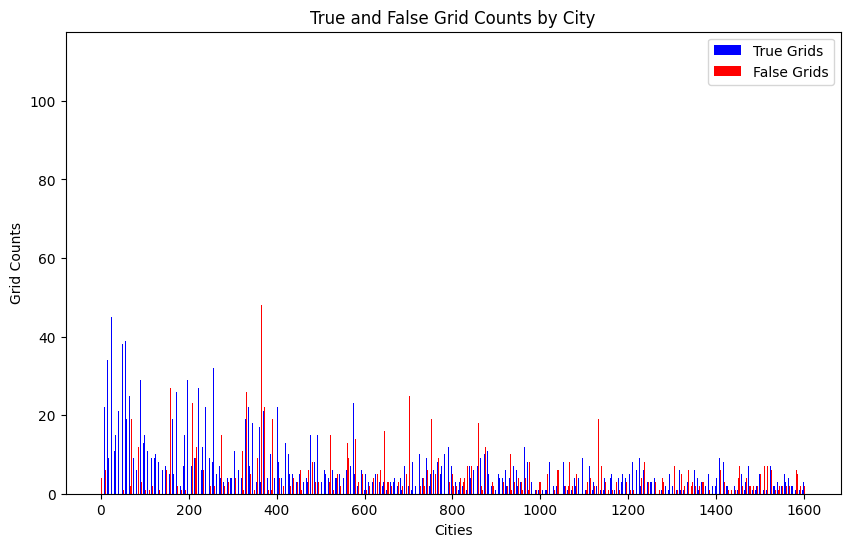

In [17]:
# 棒グラフを描画
bar_width = 0.35
index = np.arange(len(true_list))

plt.figure(figsize=(10, 6))

# TrueグリッドとFalseグリッドをそれぞれ描画
plt.bar(index, true_list, bar_width, label='True Grids', color='b')
plt.bar(index + bar_width, false_list, bar_width, label='False Grids', color='r')

# ラベルとタイトルの設定
plt.xlabel('Cities')
plt.ylabel('Grid Counts')
plt.title('True and False Grid Counts by City')
plt.legend()

# グラフを表示
plt.show()

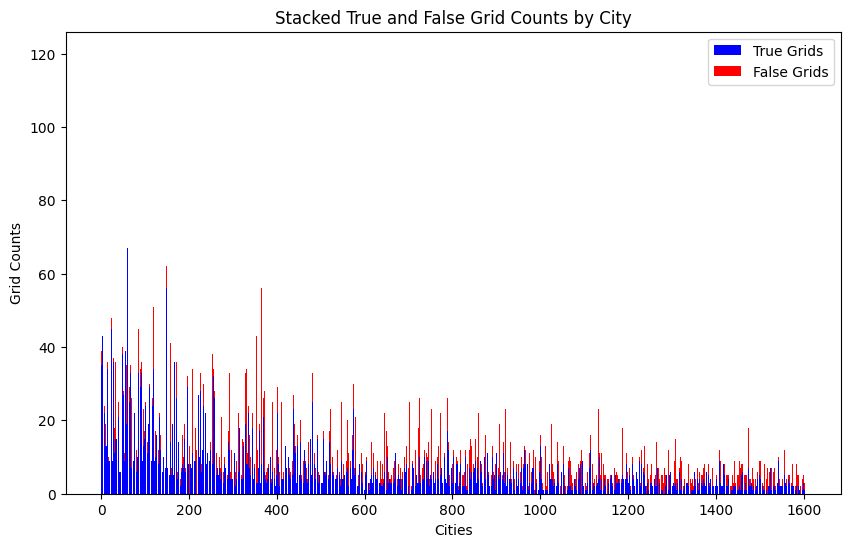

In [18]:
# 積み上げ棒グラフを描画
index = np.arange(len(true_list))
plt.figure(figsize=(10, 6))
plt.bar(index, true_list, label='True Grids', color='b')
plt.bar(index, false_list, bottom=true_list, label='False Grids', color='r')

# ラベルとタイトルの設定
plt.xlabel('Cities')
plt.ylabel('Grid Counts')
plt.title('Stacked True and False Grid Counts by City')
plt.legend()

# グラフを表示
plt.show()

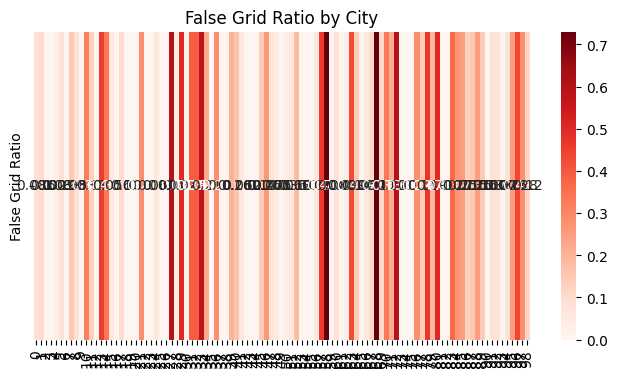

In [59]:
import seaborn as sns

# 各都市のデータ（サンプル）
# Falseグリッドの比率を計算
false_ratio = np.array(false_list) / (np.array(true_list) + np.array(false_list))

# ヒートマップを描画
plt.figure(figsize=(8, 4))
sns.heatmap([false_ratio], annot=True, cmap='Reds', cbar=True, xticklabels=index, yticklabels=['False Grid Ratio'])

# ラベルとタイトルの設定
plt.title('False Grid Ratio by City')

# グラフを表示
plt.show()